## Homework 2

#### Author: Vamsi Tallam;     Date:     23th Sept, 2021

### Task 1
Load the intrusion dataset intrusion.csv into your Jupyter notebook

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats
from sklearn.svm import SVC # "Support vector classifier"

In [2]:
Intrusion_data = pd.read_csv('intrusion.csv') 

In [5]:
# To check if the data is loaded properly
# Intrusion_data.head()
# Intrusion_data.info()
# Intrusion_data.shape

### End of Task 1

### Task 2
#### Create a scatter plot using matplotlib.pyplot with:

##### a. Attribute 1 and Attribute 2 (colored by “Intrusion”)
##### b. Attribute 2 and Attribute 3 (colored by “Intrusion”)
(These two plots should lead you to conclude that the Intrusion dataset is separable).

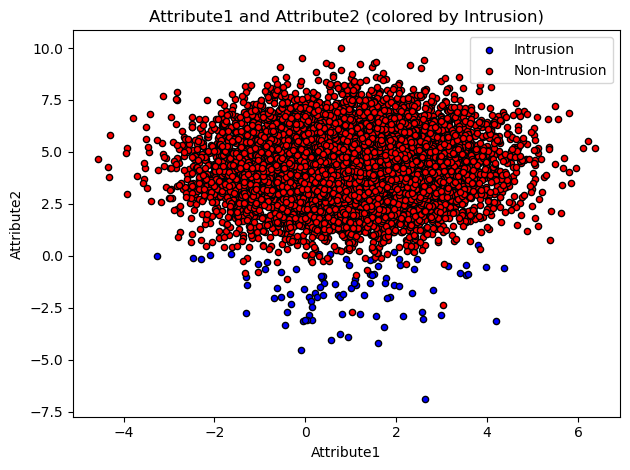

In [3]:
plt.style.use('default')
NonIntrusion0 = Intrusion_data[Intrusion_data['Intrusion'] == 0]
Intrusion1 = Intrusion_data[Intrusion_data['Intrusion'] == 1]
plt.scatter(Intrusion1['Attribute1'], Intrusion1['Attribute2'], s =20, color = 'b', edgecolor='black')
plt.scatter(NonIntrusion0['Attribute1'], NonIntrusion0['Attribute2'], s =20, color = 'r', edgecolor='black')
plt.legend(["Intrusion" , "Non-Intrusion"])
plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.title('Attribute1 and Attribute2 (colored by Intrusion)')
plt.tight_layout()
plt.show()

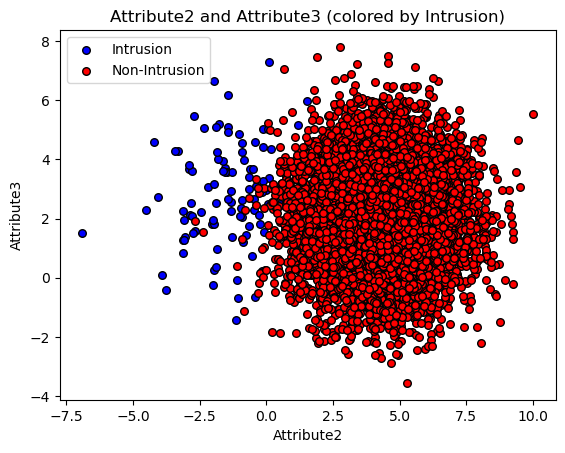

In [4]:
plt.style.use('default')
NonIntrusion0 = Intrusion_data[Intrusion_data['Intrusion'] == 0]
Intrusion1 = Intrusion_data[Intrusion_data['Intrusion'] == 1]
plt.scatter(Intrusion1['Attribute2'], Intrusion1['Attribute3'], s =30, color = 'b', edgecolor='black')
plt.scatter(NonIntrusion0['Attribute2'], NonIntrusion0['Attribute3'], s =30, color = 'r', edgecolor='black')
plt.legend(["Intrusion" , "Non-Intrusion"])
plt.xlabel('Attribute2')
plt.ylabel('Attribute3')
plt.title('Attribute2 and Attribute3 (colored by Intrusion)')
#plt.tight_layout()
plt.show()

### End of Task 2

### Task 3
#### Split the data into train and test sets using sklearn
Split the data randomly the todal data in two parts 75% as taining and 25% as testing. Seed (random_state) is used to save the state of a random function, so that it can generate same random numbers on multiple executions of the code on the same machine or on different machines (for a specific seed value).

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Intrusion_data.loc[:,'Attribute1':'Attribute3'], Intrusion_data['Intrusion'], test_size = 0.25, random_state=42, shuffle = True)

In [12]:
# To check the accuracy of split, row numbers of X.train (attributes) should match the ytain (labels intrusion) 
# Xtrain.head()
# ytrain.head()

### End of Task 3

### Task 4
#### Train a Support Vector Classifier using the following kernels Poly, Linear and RBF
4.a. Support Vector Classifier with kernal type 'poly' 

In [6]:
model_polySVC = SVC(kernel='poly', C=1E10)
model_polySVC.fit(Xtrain, ytrain)

SVC(C=10000000000.0, kernel='poly')

4.b. Support Vector Classifier with kernal type 'linear'

In [7]:
model_linearSVC = SVC(kernel='linear', C=1E10)
model_linearSVC.fit(Xtrain, ytrain)

SVC(C=10000000000.0, kernel='linear')

4.c. Support Vector Clasifier with kernal type 'RBF'

In [8]:
model_rbfSVC = SVC(kernel='rbf', C=1E10)
model_rbfSVC.fit(Xtrain, ytrain)

SVC(C=10000000000.0)

### End of Task 4

### Task 5
#### Output confusion matrices and classification reports of the test set with each of your SV classifiers.
a. Your notebook should clearly label true positives, false positives, true negatives and false negatives

In [9]:
# predict labels for each of the trained model 
ylabels_polySVC   = model_polySVC.predict(Xtest)
ylabels_linearSVC = model_linearSVC.predict(Xtest)
ylabels_rbfSVC    = model_rbfSVC.predict(Xtest)

In [20]:
# To test if the labels are correctly ploted for linearSVC case
# ytest[ytest != ylabels_linearSVC]

8576    1
2457    1
8772    0
Name: Intrusion, dtype: int64

This simple test implies that 2 cases where there is intrusion (True label is class 1), model predicted non-intrusion (Predicted label is class 0).False Negative

##### Confusion Matrix and classification report for SVC using polynomial kernel

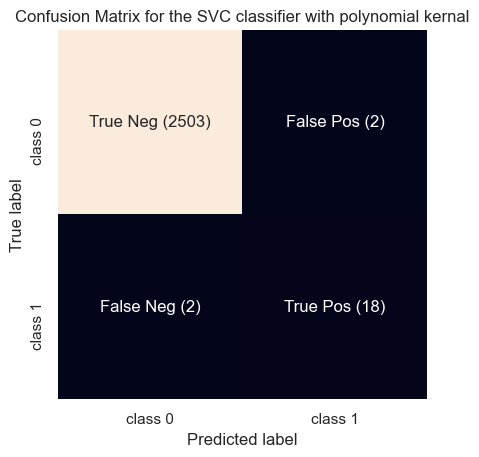

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, ylabels_polySVC)
labels = ['True Neg','False Pos','False Neg','True Pos']
annotations = [f"{v1} ({v2})" for v1, v2 in zip(labels, mat.flatten())]
annotations = np.asarray(annotations).reshape(2,2)

sns.heatmap(mat.T, square=True, annot=annotations, fmt='', cbar=False, xticklabels= ['class 0', 'class 1'], yticklabels= ['class 0', 'class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label');

plt.title('Confusion Matrix for the SVC classifier with polynomial kernal')
plt.show()

In [29]:
from sklearn.metrics import classification_report
target_names = ['Non-Intrusion(class 0)', 'Intrsuion (class 1)']
print('Classification report for SVC classifier with polynomial kernal')
print(classification_report(ytest, ylabels_polySVC, target_names=target_names))

Classification report for SVC classifier with polynomial kernal
                        precision    recall  f1-score   support

Non-Intrusion(class 0)       1.00      1.00      1.00      2505
   Intrsuion (class 1)       0.90      0.90      0.90        20

              accuracy                           1.00      2525
             macro avg       0.95      0.95      0.95      2525
          weighted avg       1.00      1.00      1.00      2525



##### Confusion Matrix and classification report for SVC using Linear kernel

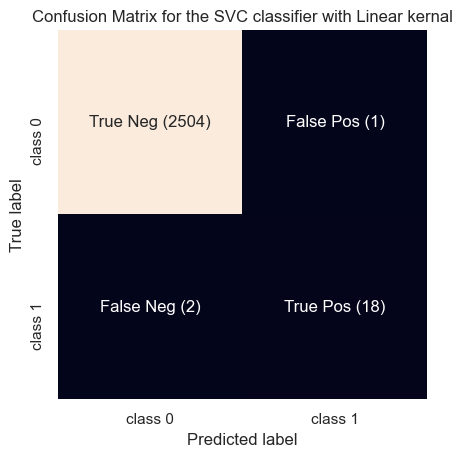

In [37]:
mat = confusion_matrix(ytest, ylabels_linearSVC)
labels = ['True Neg','False Pos','False Neg','True Pos']
annotations = [f"{v1} ({v2})" for v1, v2 in zip(labels, mat.flatten())]
annotations = np.asarray(annotations).reshape(2,2)

sns.heatmap(mat.T, square=True, annot=annotations, fmt='', cbar=False, xticklabels= ['class 0', 'class 1'], yticklabels= ['class 0', 'class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label');

plt.title('Confusion Matrix for the SVC classifier with Linear kernal')
plt.show()

In [31]:
target_names = ['Non-Intrusion(class 0)', 'Intrsuion (class 1)']
print('Classification report for SVC classifier with Linear kernal')
print(classification_report(ytest, ylabels_linearSVC, target_names=target_names))

Classification report for SVC classifier with Linear kernal
                        precision    recall  f1-score   support

Non-Intrusion(class 0)       1.00      1.00      1.00      2505
   Intrsuion (class 1)       0.95      0.90      0.92        20

              accuracy                           1.00      2525
             macro avg       0.97      0.95      0.96      2525
          weighted avg       1.00      1.00      1.00      2525



##### Confusion Matrix and classification report for SVC using RBF kernel

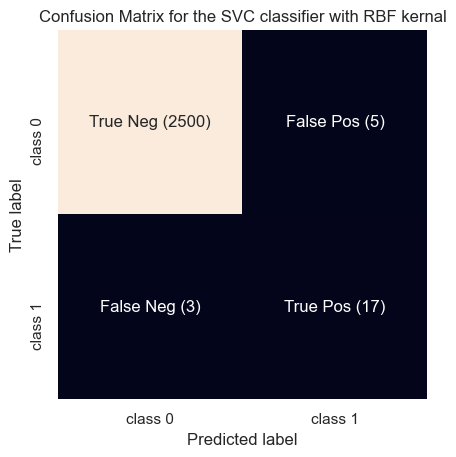

In [38]:
mat = confusion_matrix(ytest, ylabels_rbfSVC)
labels = ['True Neg','False Pos','False Neg','True Pos']
annotations = [f"{v1} ({v2})" for v1, v2 in zip(labels, mat.flatten())]
annotations = np.asarray(annotations).reshape(2,2)

sns.heatmap(mat.T, square=True, annot=annotations, fmt='', cbar=False, xticklabels= ['class 0', 'class 1'], yticklabels= ['class 0', 'class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label');

plt.title('Confusion Matrix for the SVC classifier with RBF kernal')
plt.show()

In [33]:
target_names = ['Non-Intrusion(class 0)', 'Intrsuion (class 1)']
print('Classification report for SVC classifier with RBF kernal')
print(classification_report(ytest, ylabels_rbfSVC, target_names=target_names))

Classification report for SVC classifier with RBF kernal
                        precision    recall  f1-score   support

Non-Intrusion(class 0)       1.00      1.00      1.00      2505
   Intrsuion (class 1)       0.77      0.85      0.81        20

              accuracy                           1.00      2525
             macro avg       0.89      0.92      0.90      2525
          weighted avg       1.00      1.00      1.00      2525



### End of Task 5

### Task 6
Train a Random Forest Classifier on the dataset

In [34]:
from sklearn.ensemble import RandomForestClassifier

model_randomForest = RandomForestClassifier(n_estimators=1000)
model_randomForest.fit(Xtrain, ytrain)
ylabels_randomForest = model_randomForest.predict(Xtest)

### End of task 6

### Task 7
##### Confusion Matrix and classification report for SVC using RBF kernel

Text(0.5, 1.0, 'Confusion Matrix for the Random Forest Classifier')

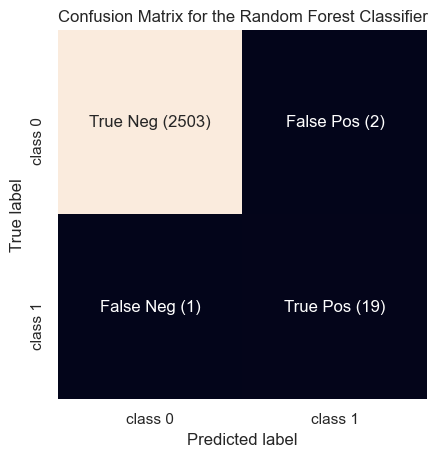

In [39]:
mat = confusion_matrix(ytest, ylabels_randomForest)
labels = ['True Neg','False Pos','False Neg','True Pos']
annotations = [f"{v1} ({v2})" for v1, v2 in zip(labels, mat.flatten())]
annotations = np.asarray(annotations).reshape(2,2)

sns.heatmap(mat.T, square=True, annot=annotations, fmt='', cbar=False, xticklabels= ['class 0', 'class 1'], yticklabels= ['class 0', 'class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label');

plt.title('Confusion Matrix for the Random Forest Classifier')

In [29]:
target_names = ['Non-Intrusion(class 0)', 'Intrsuion (class 1)']
print('Classification report for Random Forest classifier')
print(classification_report(ytest, ylabels_randomForest, target_names=target_names))

Classification report for Random Forest classifier
                        precision    recall  f1-score   support

Non-Intrusion(class 0)       1.00      1.00      1.00      2505
   Intrsuion (class 1)       0.90      0.95      0.93        20

              accuracy                           1.00      2525
             macro avg       0.95      0.97      0.96      2525
          weighted avg       1.00      1.00      1.00      2525



### End of Task 7

## Appendix
### To visualize the 3D plot

<IPython.core.display.Javascript object>


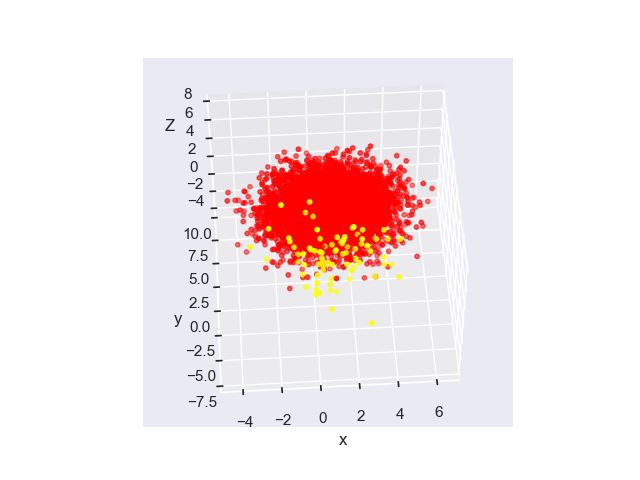

In [30]:
%matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.subplot(111,projection = '3d')
ax.scatter3D(Xtrain['Attribute1'], Xtrain['Attribute2'], Xtrain['Attribute3'], c=ytrain, s=10, cmap='autumn')
    #ax.view_init(elev=elev, azim=azim)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Z')
plt.show()

### End of Homework 2